# EDA

In [155]:
# LIBRERIAS
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np

# PASO 1: Planteamiento del problema

- Predecir el coste del seguro médico de una persona.



In [156]:
# CARGAR EN DATASET

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
total_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# PASO 2: Exploración y Limpieza de los Datos.

In [157]:
# Conocer las dimensiones del Dataset
total_data.shape

(1338, 7)

In [158]:
# Obtener información sobre los tipos de datos y valores no nulos
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [159]:
total_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Una vez obtenida la información del Dataset, se extraen las siguientes conclusiones: 

- Existen un total de 1332 filas y 7 columnas, en las que encontramos la target, charges, que indica la prima del seguro médico.
- Descripción de las columnas: 4 son de variables continuas y 3 son de variables categóricas.
- El Dataset no contiene valores nulos.

ELIMINAR DUPLICADOS.

In [160]:
total_data.duplicated().sum()

np.int64(1)

In [161]:
data_without_duplicates = total_data.drop_duplicates(subset = total_data.columns)

In [162]:
data_without_duplicates.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [163]:
data_without_duplicates.shape

(1337, 7)

ELIMINAR INFORMACIÓN IRRELEVANTE. 

AL TRATARSE DE UN DATASET CON POCAS COLUMNAS, Y QUE SE INFIERE QUE TODAS PUEDEN APORTAR INFORMACIÓN, NO SE ELIMINAN COLUMNAS EN ÉSTE PASO.

In [164]:
clean_data = data_without_duplicates.copy()

# PASO 3: Análisis de variables univariante.

- ANÁLISIS DE VARIABLES CATEGÓRICAS:

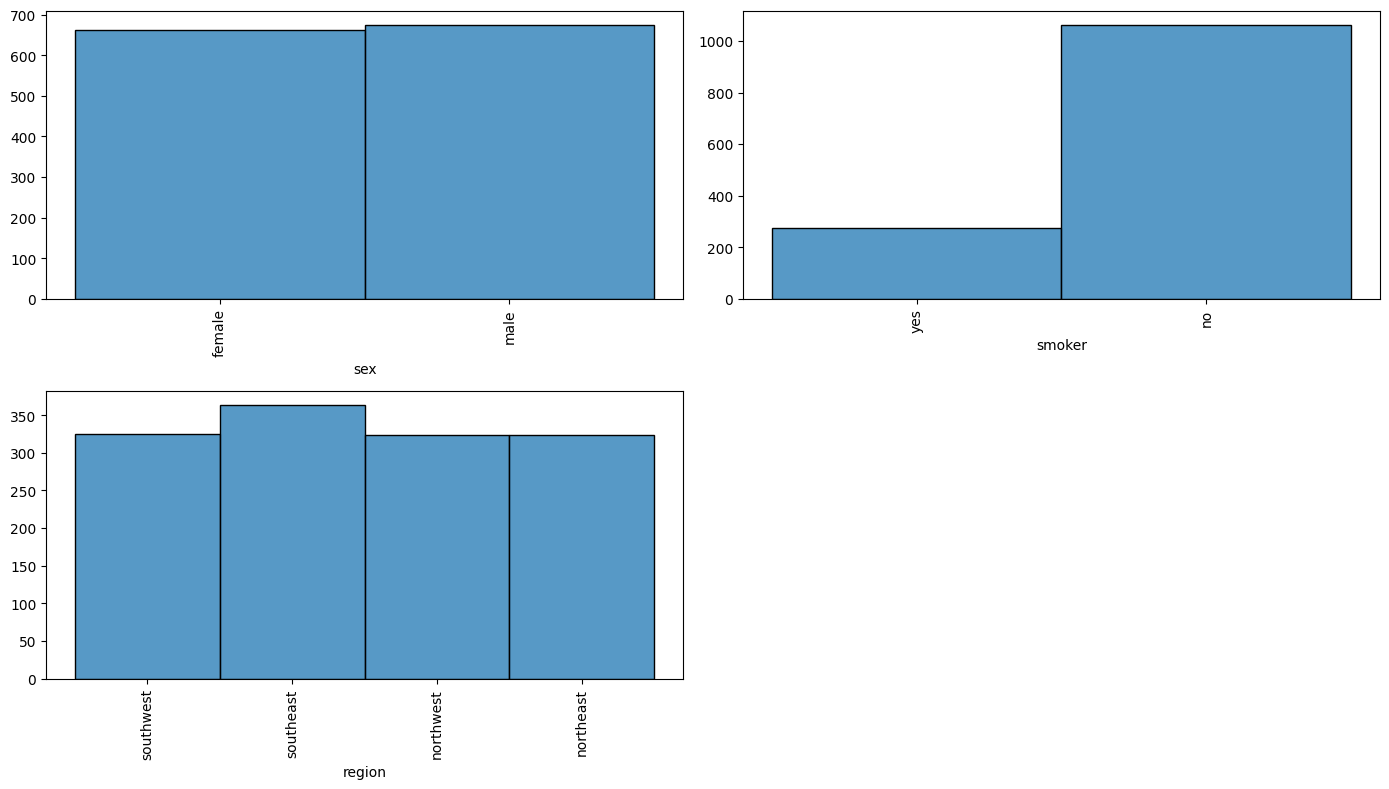

In [165]:
# Lista de variables categóricas: 
categorical_vars = ["sex", "smoker", "region"]

# Configurar número de filas y columnas
n_cols = 2  
n_rows = (len(categorical_vars) + n_cols - 1) // n_cols  

# Crear la figura y los ejes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()  

# Generar los histogramas
for i, var in enumerate(categorical_vars):
    sns.histplot(data=clean_data, x=var, ax=axes[i])
    axes[i].set_ylabel(None)  
    axes[i].tick_params(axis='x', rotation=90)  # Rotar etiquetas del eje X

# Eliminar ejes vacíos si hay menos variables que espacios en la cuadrícula
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el diseño
plt.tight_layout()
plt.show()

OBSERVACIONES Y CONCLUSIONES DE LOS GRÁFICOS DEL ANÁLISIS DE VARIABLES CATEGÓRICAS

- Sex: La cantidad de hombres y mujeres en el dataset es bastante equilibrada, con una presencia mayoritaria de hombres.
- Smoker: Hay más clientes No fumadores, hay una baja tasa de tabaquismo entre los clientes a estudiar. 
- Region: las cuatro regiones (`southwest`, `southeast`, `northwest` y `notheast`) tienen distribuciones similares, con un ligero predominio en la region de `southeast`.

##############################################

- ANÁLISIS DE VARIABLES NUMÉRICAS:

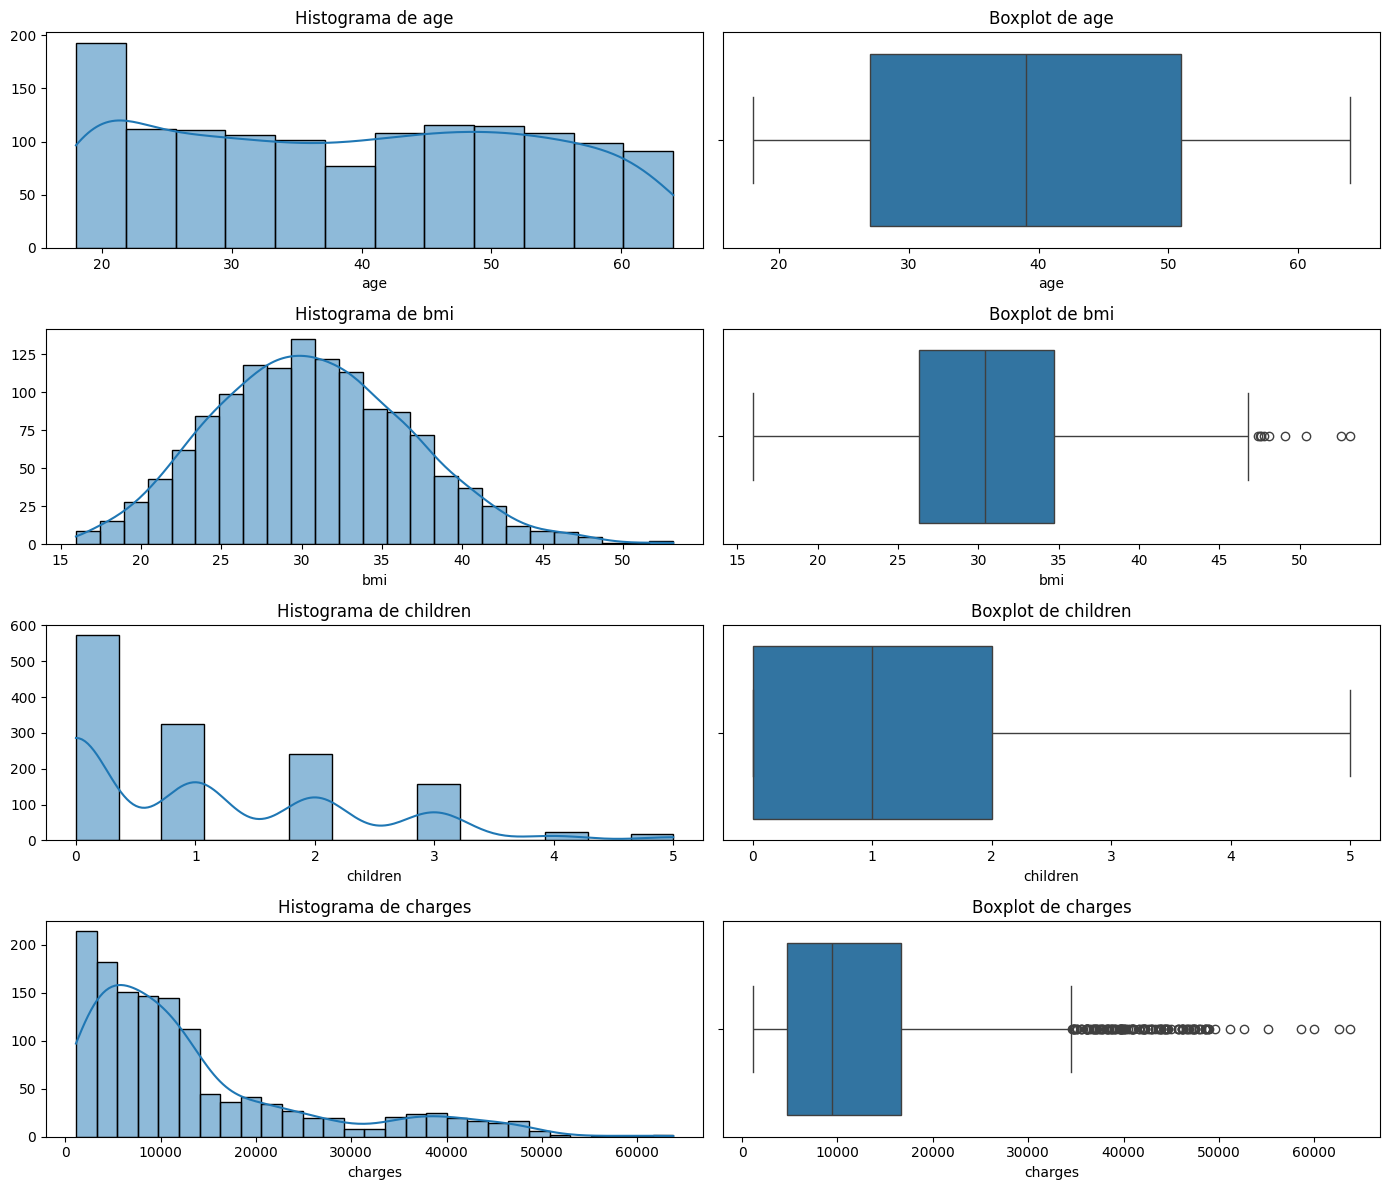

In [166]:
# Lista de variables numéricas
numerica_vars = ["age", "bmi", "children", "charges"]

# Configurar número de filas y columnas (2 gráficos por variable)
n_cols = 2  # Primera columna: Histograma, Segunda columna: Boxplot
n_rows = len(numerica_vars)  # Cada variable ocupa una fila

# Crear la figura y los ejes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 3 * n_rows))
axes = axes.reshape(n_rows, n_cols)  # Asegurar que sea una matriz

# Generar histogramas y boxplots
for i, var in enumerate(numerica_vars):
    # Histograma
    sns.histplot(data=clean_data, x=var, ax=axes[i, 0], kde=True)  # kde=True para suavizado
    axes[i, 0].set_ylabel(None)
    axes[i, 0].set_title(f"Histograma de {var}")

    # Boxplot
    sns.boxplot(data=clean_data, x=var, ax=axes[i, 1])
    axes[i, 1].set_ylabel(None)
    axes[i, 1].set_title(f"Boxplot de {var}")

# Ajustar diseño para mejor visualización
plt.tight_layout()
plt.show()

OBSERVACIONES Y CONCLUSIONES DEL ANÁLISIS DE VARIABLES CONTINUAS.

- Age: La distribución es bastante uniforme, aunque hay un pico de valores más bajos, entre los 18-20 años. No hay valores atípicos evidentes, lo que indica que los datos están bien distribuidos en los cuartiles.
- Bmi: La distribución es aproximadamente normal, con una ligera asimetría a la derecha. Se observan valores atípicos en el extremo superior, lo que sugiere la presencia de personas con obesidad o un índice de masa corporal extremadamente alto.
- Children: La mayoría de los clientes del dataset no tienen hijos, y hay una disminución progresiva en la cantidad de clientes con más hijos. Hay algunos valores atípicos en el extremo superior, es decir, en las familias con más de 4 hijos, pero la mayoría se encuentran entre el rango de 0 a 3 hijos.
- Charges: La distribución esta fuertemente sesgada a la derecha, lo que indica que los clientes pagan costos bajos, pero hay algunos casos con costos médicos extremadamente altos. Hay numerosos valores atípicos en el extremo superior, lo que sugiere que algunos clientes tienen gastos médicos muy elevados. Esto podría estar relacionado con factores como tabaquismo, edad avanzada o un bmi alto. 

# PASO 4: Análisis de variables multivariante

- ANÁLISIS DE VARIABLES CATEGÓRICA-CATEGÓRICA

`sex`, `smoker` y `region`

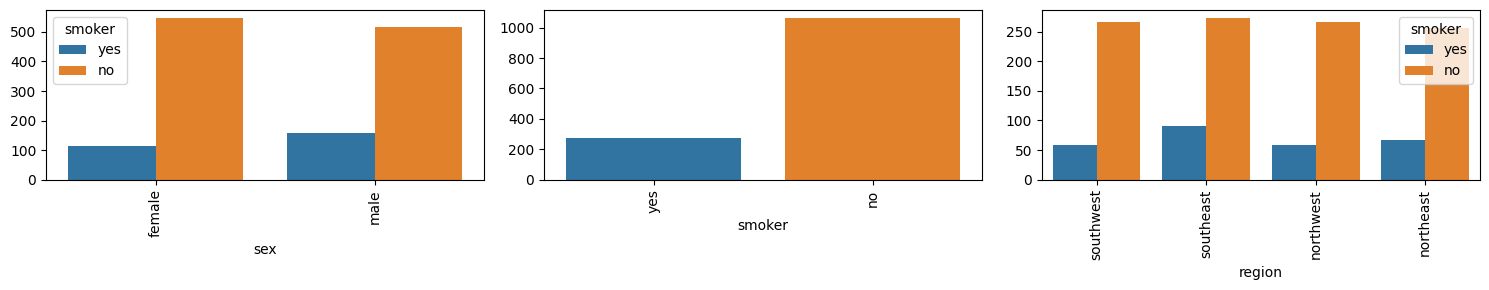

In [167]:
# Variables categóricas a graficar
categorical_vars = ["sex", "smoker", "region"]

# Crear la figura con 2 filas y 3 columnas
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

# Generar gráficos usando un bucle
for ax, var in zip(axes.flat, categorical_vars):
    sns.countplot(ax=ax, data=clean_data, x=var, hue="smoker")
    ax.set_ylabel(None)  # Quitar etiquetas innecesarias
    ax.tick_params(axis="x", rotation=90)  # Rotar etiquetas X

# Ajustar diseño
plt.tight_layout()
plt.show()

OBSERVACIONES Y CONCLUSIONES DE ANÁLISIS MULTIVARIANTE CATEGÓRICO-CATEGÓRICO

- Relación sex-smoker: tanto hombres como mujeres, hay una mayor cantidad de no fumadores en comparación con los fumadores. La proporción de fumadores parece ser un poco mayor en los hombres que en las mujeres, aunque la diferencia no es muy grande. 
- Relación region-smoker: en todas las regiones los NO fumadores son significativamente más numerosos que los fumadores. hay una ligera cantidad mayor de fumadores en la region de `southeast` en comparación con las otras. 

El hábito de fumar es poco frecuente en este grupo de clientes, ya que hay más NO fumadores en todas las categorías analizadas. Sería interesante analizar cómo el tabaquismo influye en los costos médicos (`charges`), ya que es un factor de riesgo para muchas enfermedades. 

####################################################################################

- ANÁLISIS DE VARIABLES MULTIVARIANTE NUMÉRICO-NUMÉRICO 

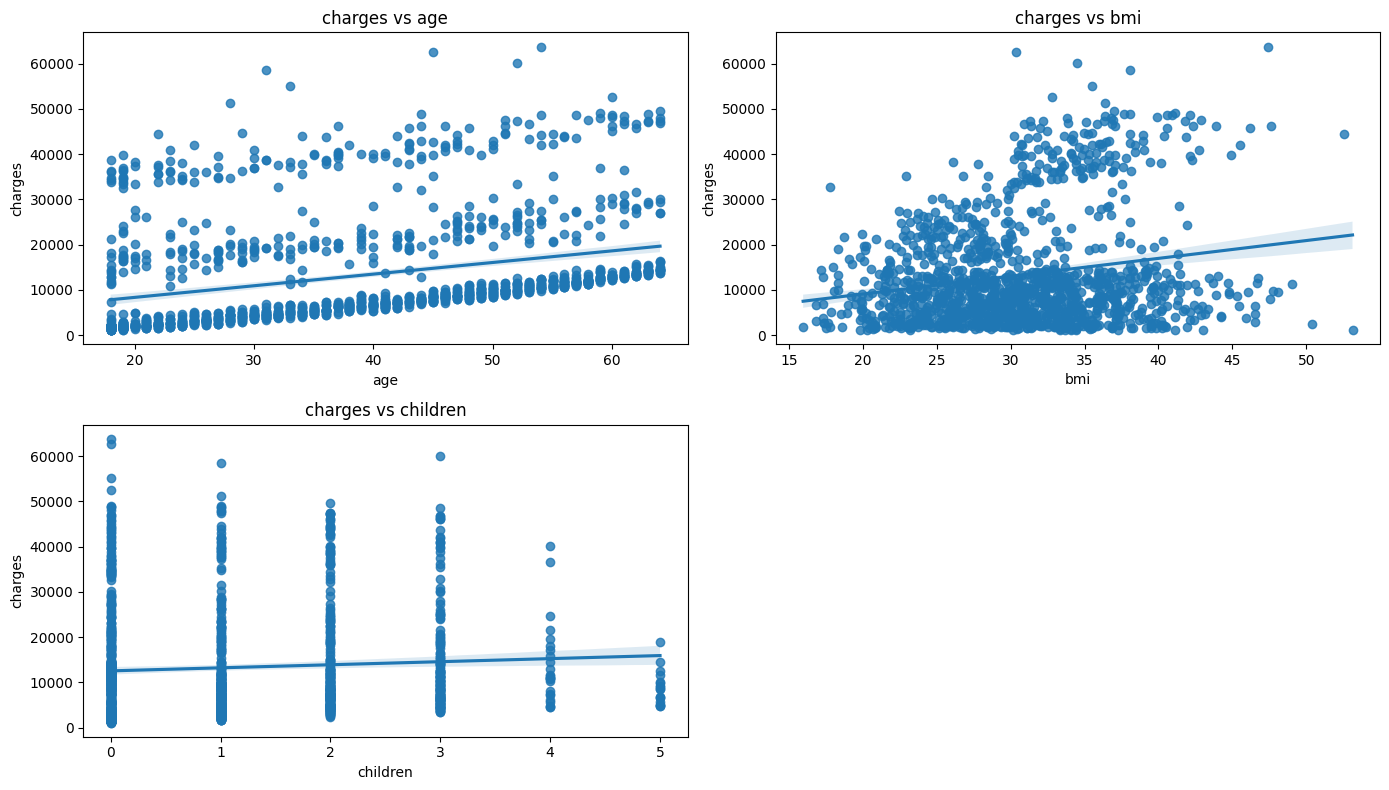

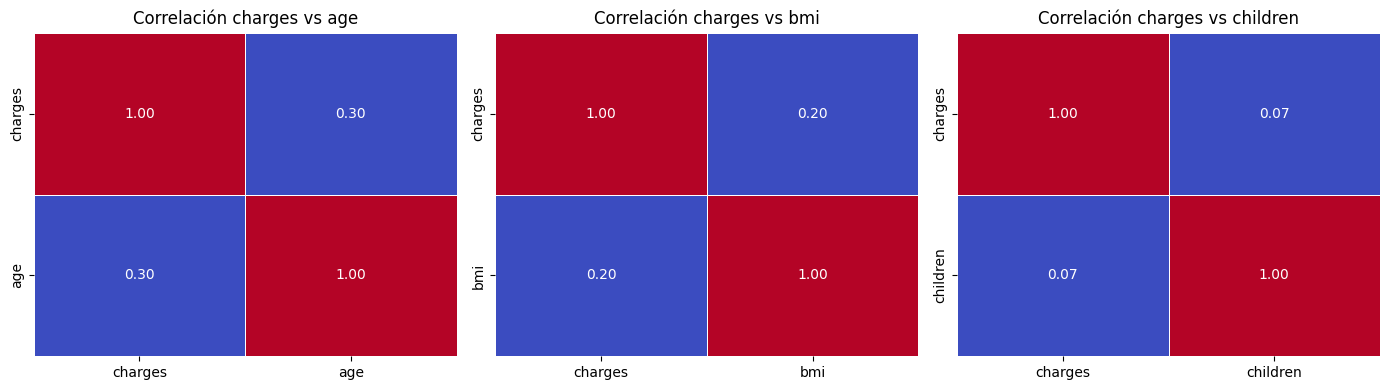

In [168]:
# Definir variables
num_vars = ["age", "bmi", "children"]
target = "charges"

n_cols = 2  # Fijamos columnas para orden limpio
n_rows = np.ceil(len(num_vars) / n_cols).astype(int)  # Calculamos filas dinámicamente

# Crear la figura
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()  

# Graficar regplot num_var vs target
for i, var in enumerate(num_vars):
    sns.regplot(data=clean_data, x=var, y=target, ax=axes[i])
    axes[i].set_title(f"{target} vs {var}")

# Eliminar ejes vacíos si hay menos gráficos que espacios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el diseño
plt.tight_layout()
plt.show()


n_cols = 3  # Más columnas para mejor ajuste
n_rows = np.ceil(len(num_vars) / n_cols).astype(int)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()

for i, var in enumerate(num_vars):
    sns.heatmap(clean_data[[target, var]].corr(), annot=True, fmt=".2f", cmap="coolwarm",
                cbar=False, linewidths=0.5, ax=axes[i])
    axes[i].set_title(f"Correlación {target} vs {var}")

# Eliminar ejes vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- COMBINACIONES DE LA CLASE CON VARIAS PREDICTORAS.

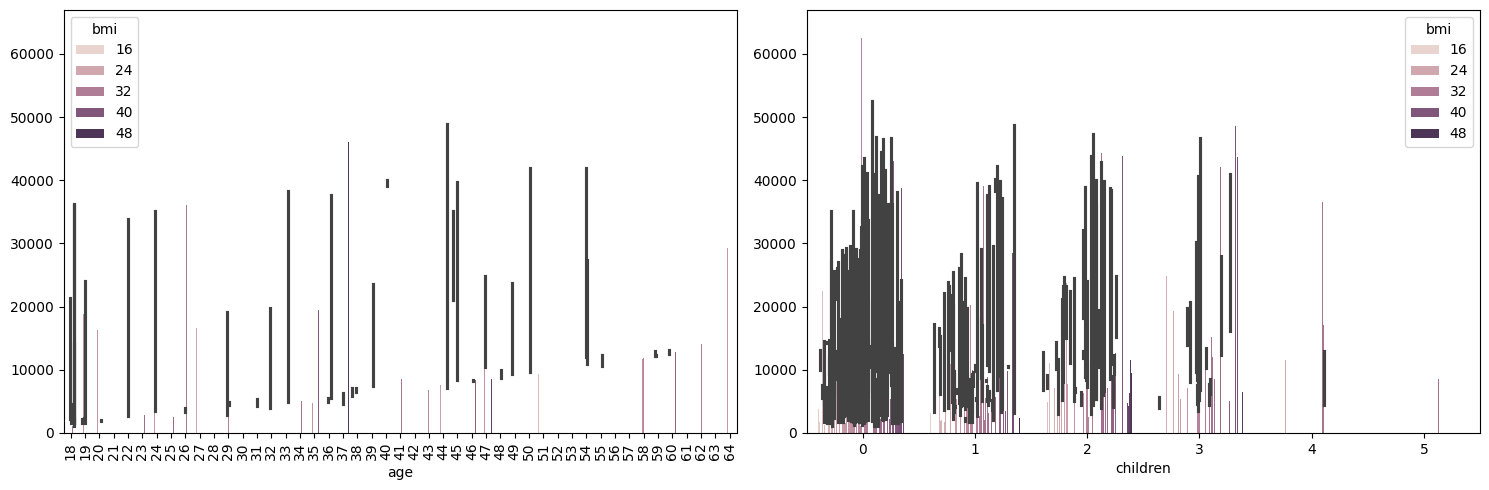

In [169]:
fig, axis = plt.subplots(figsize = (15, 5), ncols = 2)

sns.barplot(ax = axis[0], data = clean_data, x = "age", y = 'charges', hue = 'bmi').set(ylabel = None)
for tick in axis[0].get_xticklabels():
    tick.set_rotation(90)

sns.barplot(ax = axis[1], data = clean_data, x = "children", y = 'charges', hue = 'bmi').set(ylabel = None)
for tick in axis[1].get_xticklabels():
    tick.set_rotation(0)

plt.tight_layout()
plt.show()

OBSERVACIONES

- ANÁLISIS DE CORRELACIONES:

In [170]:
clean_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [171]:
# FACTORIZACIÓN DE VARIABLES CATEGÓRICAS

clean_data["sex_n"] = pd.factorize(clean_data["sex"])[0]
clean_data["smoker_n"] = pd.factorize(clean_data["smoker"])[0]
clean_data["region_n"] = pd.factorize(clean_data["region"])[0]

sex_transformation_rules = {row["sex"]: row["sex_n"] for _, row in clean_data[["sex", "sex_n"]].drop_duplicates().iterrows()}

with open("sex_transformation_rules.json", "w") as f:
  json.dump(sex_transformation_rules, f)

smoker_transformation_rules = {row["smoker"]: row["smoker_n"] for _, row in clean_data[["smoker", "smoker_n"]].drop_duplicates().iterrows()}

with open("smoker_transformation_rules.json", "w") as f:
  json.dump(smoker_transformation_rules, f)

region_transformation_rules = {row["region"]: row["region_n"] for _, row in clean_data[["region", "region_n"]].drop_duplicates().iterrows()}

with open("region_transformation_rules.json", "w") as f:
  json.dump(region_transformation_rules, f)

In [172]:
clean_data.head()

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2


- Análisis de correlaciones de variables categóricas.

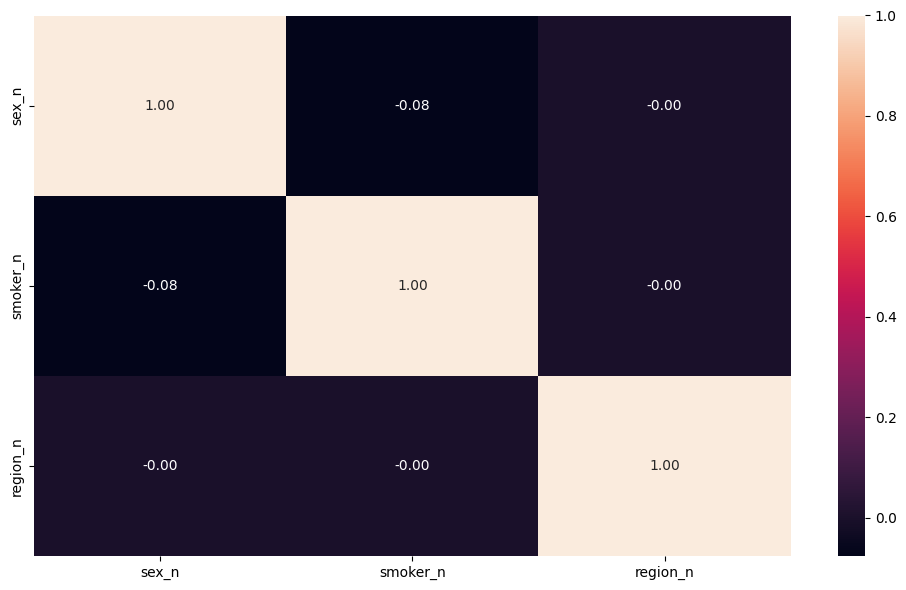

In [173]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(clean_data[["sex_n", "smoker_n", "region_n"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

- Análisis de correlaciones de variables continuas.

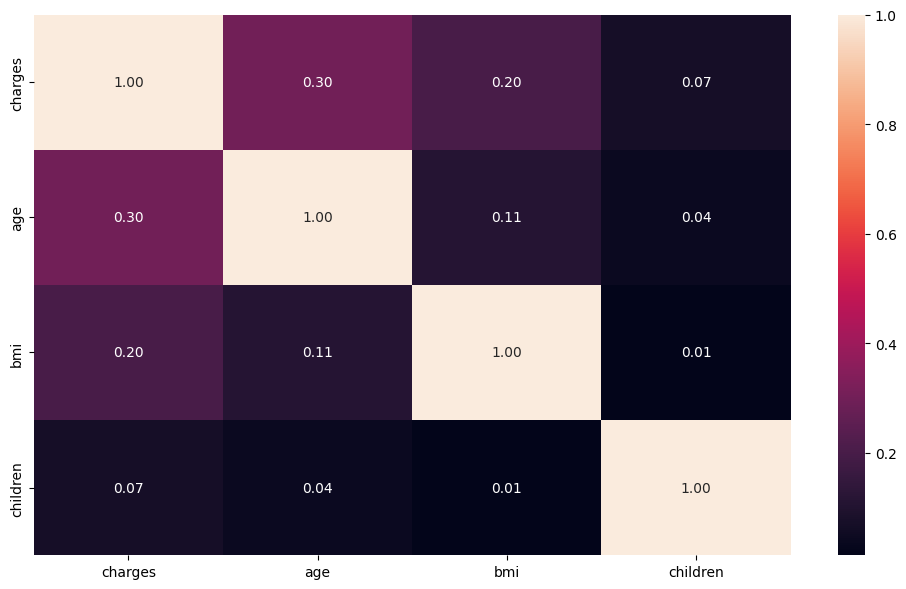

In [174]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[["charges", "age", "bmi", "children"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

- Análisis de correlaciones de variables continuas-categóricas completo.

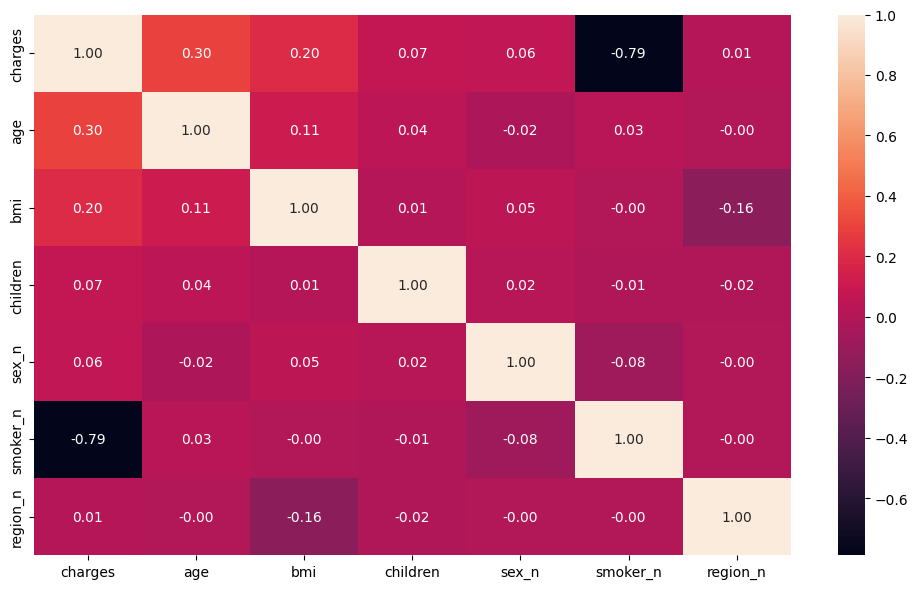

In [175]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(clean_data[["charges", "age", "bmi", "children", "sex_n", "smoker_n", "region_n"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Existe una relación entre la prima del seguro médico (`charges`), que es la target, y si el cliente es fumador o no.

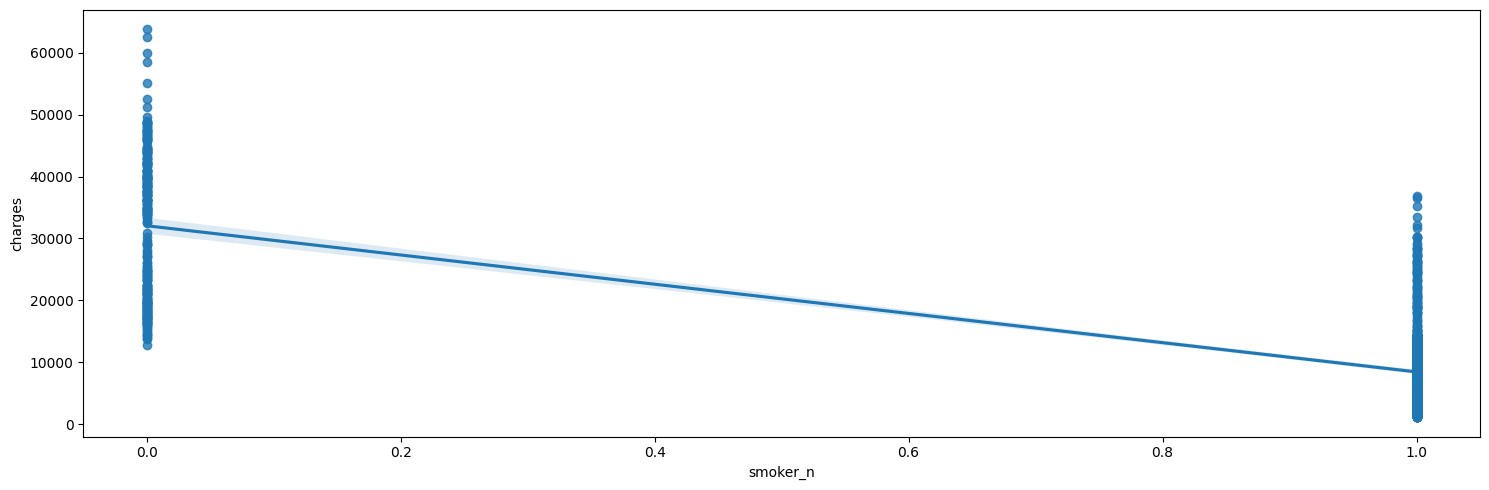

In [176]:
fig, ax = plt.subplots(figsize=(15, 5))  

sns.regplot(ax=ax, data=clean_data, x="smoker_n", y="charges")

plt.tight_layout()
plt.show()

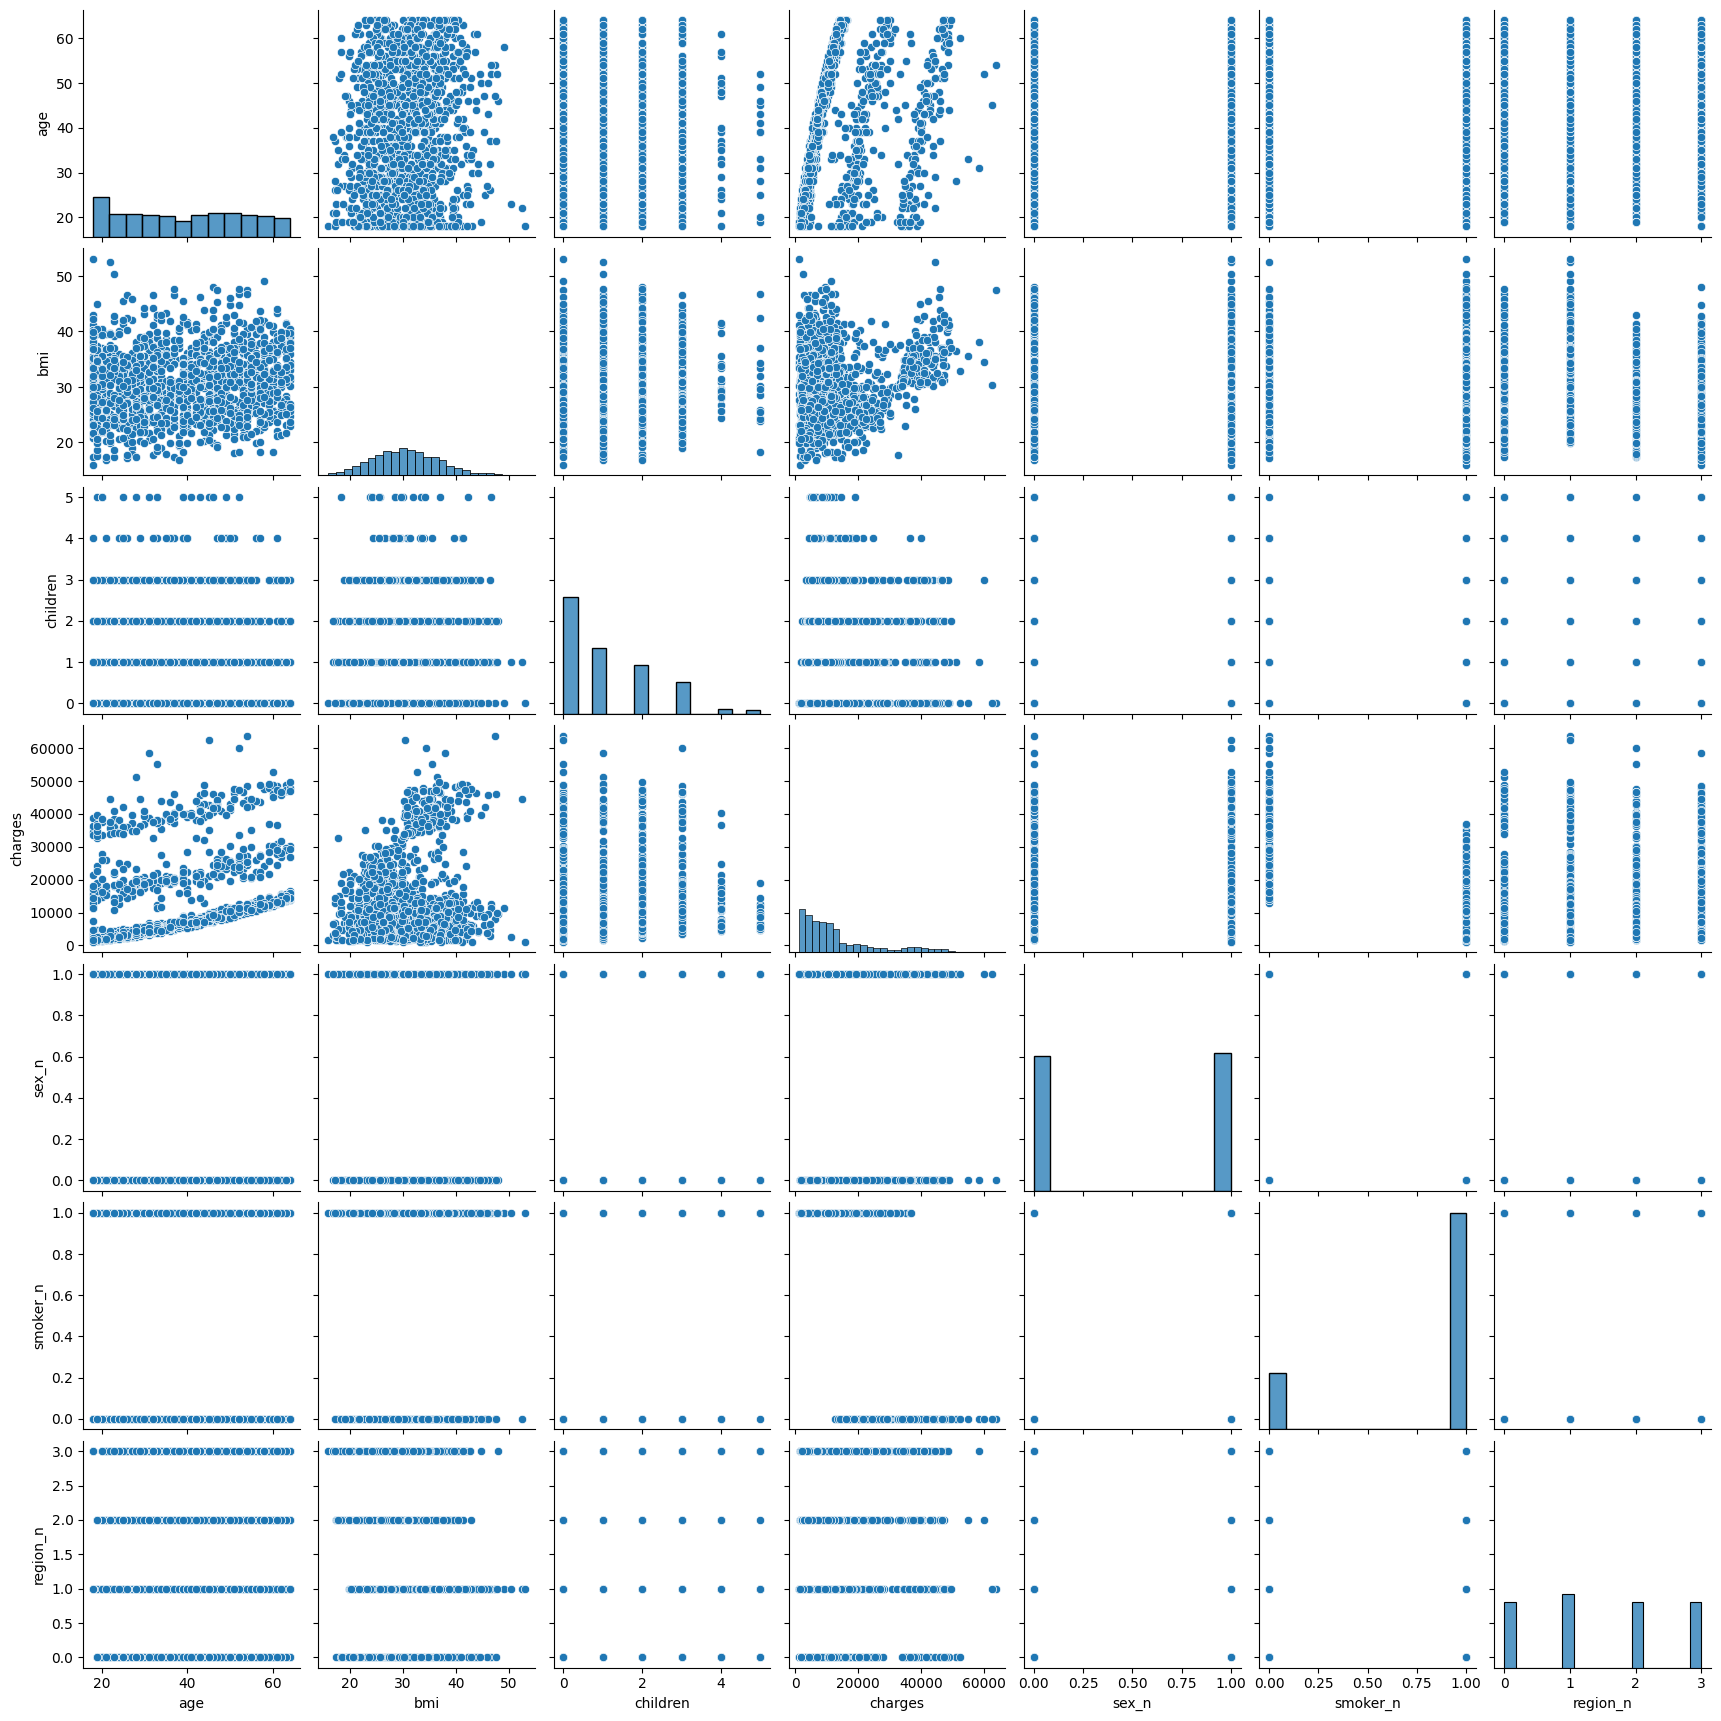

In [177]:
sns.pairplot(data = clean_data)

# PASO 5: Ingeniería de características *(feature engineering)*

- ANÁLISIS DE OUTLIERS

In [178]:
clean_data.describe()

,age,bmi,children,charges,sex_n,smoker_n,region_n
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487,0.504862,0.795064,1.483919
std,14.044333,6.100468,1.205571,12110.359656,0.500163,0.403806,1.105208
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.290000,0.000000,4746.344000,0.000000,1.000000,1.000000
50%,39.000000,30.400000,1.000000,9386.161300,1.000000,1.000000,1.000000
75%,51.000000,34.700000,2.000000,16657.717450,1.000000,1.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


- BOXPLOTS DE VARIABLES: Dibujar los diagramas de cajas de las variables también nos da una información muy poderosa sobre los valores atípicos que se salen de las regiones de confianza.

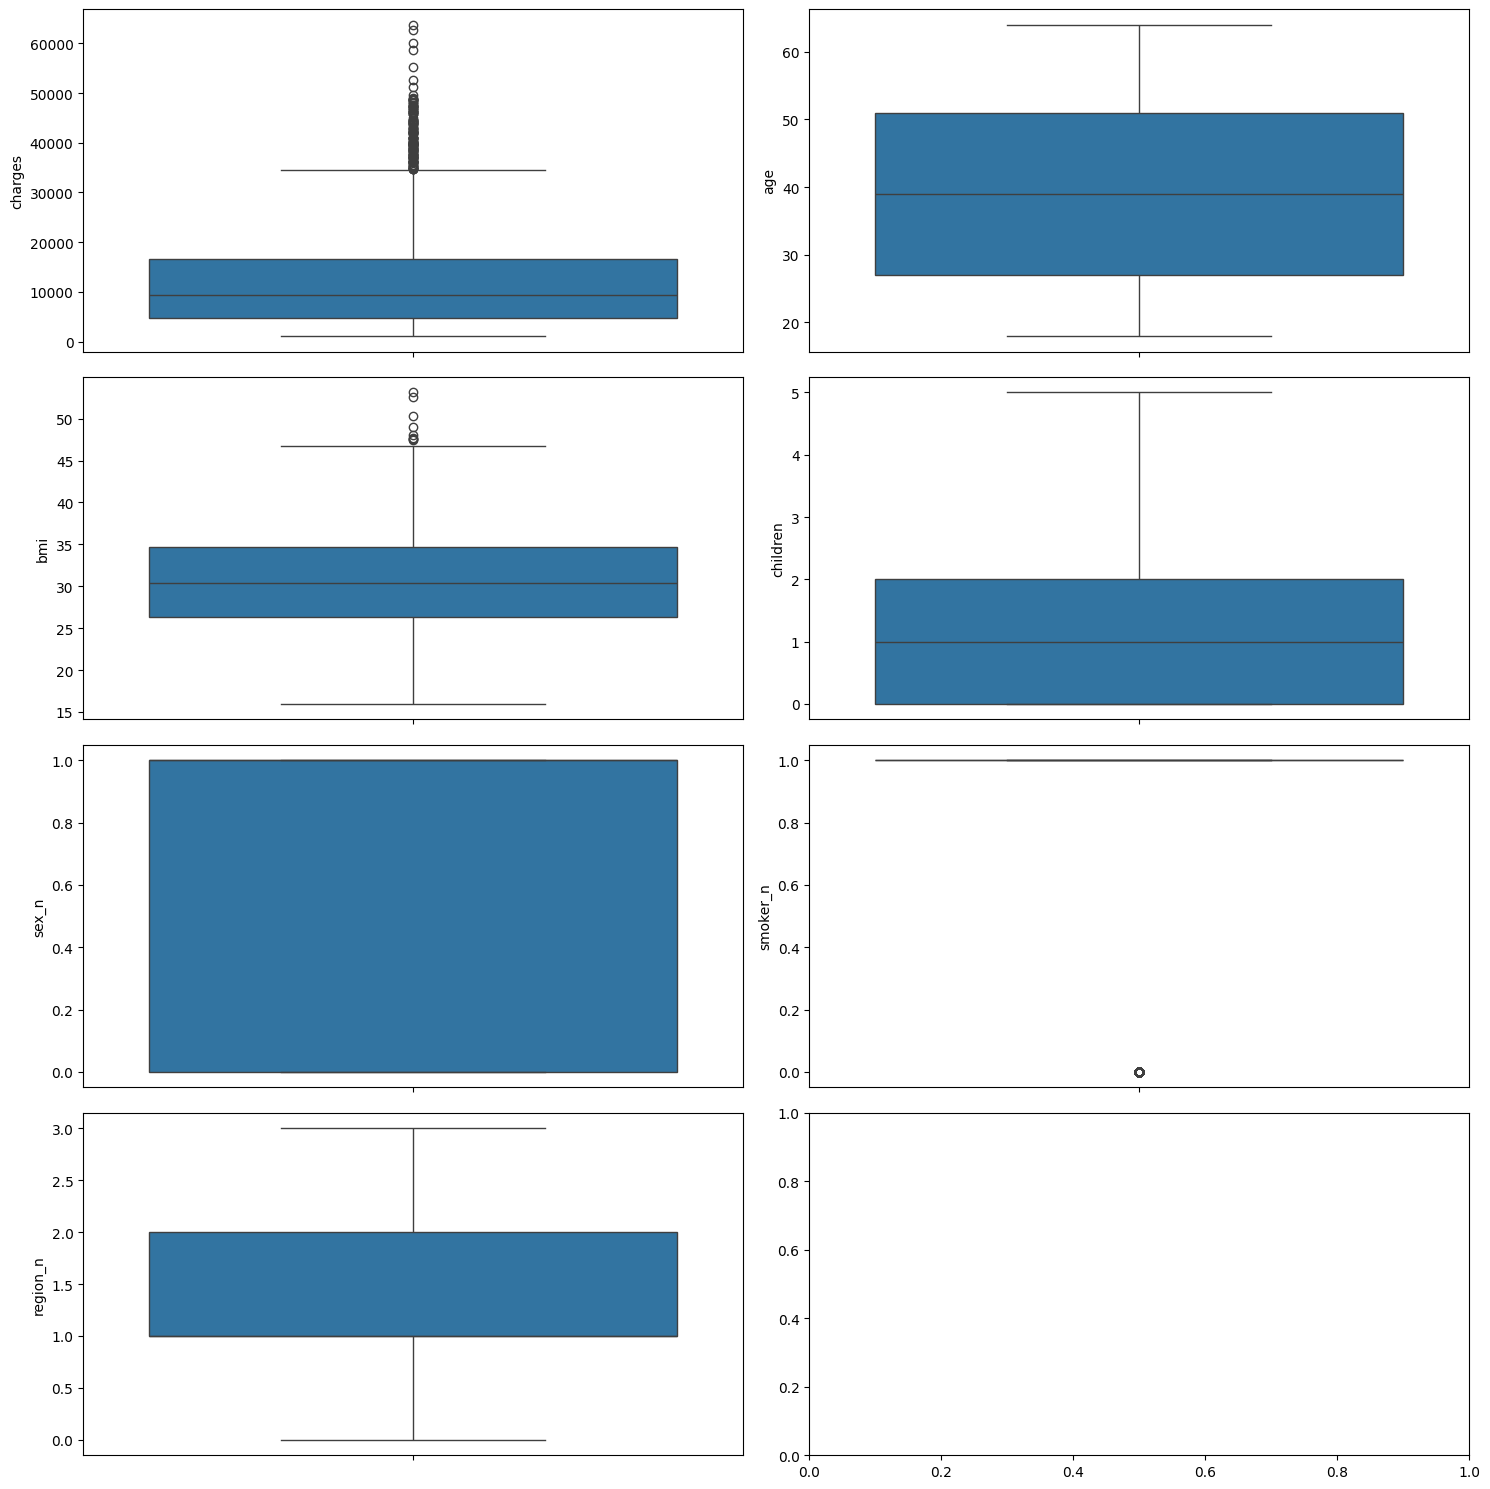

In [179]:
fig, axis = plt.subplots(4, 2, figsize = (15, 15))

sns.boxplot(ax = axis[0, 0], data = clean_data, y = "charges")
sns.boxplot(ax = axis[0, 1], data = clean_data, y = "age")
sns.boxplot(ax = axis[1, 0], data = clean_data, y = "bmi")
sns.boxplot(ax = axis[1, 1], data = clean_data, y = "children")
sns.boxplot(ax = axis[2, 0], data = clean_data, y = "sex_n")
sns.boxplot(ax = axis[2, 1], data = clean_data, y = "smoker_n")
sns.boxplot(ax = axis[3, 0], data = clean_data, y = "region_n")

plt.tight_layout()

plt.show()

Podemos determinar que las variables afectadas por outliers son `charges`, `bmi` y `smoker_n`.

In [180]:
# Generar nuevos archivos, con y sin outliers
clean_data_con_outliers = clean_data.copy()
clean_data_sin_outliers = clean_data.copy()

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = 0
  
  # Replace upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Replace lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in ["age", "bmi", "children", "sex_n", "smoker_n", "region_n"]:
  clean_data_sin_outliers_sin_outliers, limits_list = replace_outliers_from_column(column, clean_data_sin_outliers)
  outliers_dict[column] = limits_list

with open("outliers_replacement.json", "w") as f:
   json.dump(outliers_dict, f)
outliers_dict

{'age': [0, np.float64(87.0)],
 'bmi': [np.float64(13.674999999999994), np.float64(47.31500000000001)],
 'children': [0, np.float64(5.0)],
 'sex_n': [0, np.float64(2.5)],
 'smoker_n': [np.float64(1.0), np.float64(1.0)],
 'region_n': [0, np.float64(3.5)]}

In [181]:
clean_data_sin_outliers

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,1.0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1.0,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1.0,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1.0,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1.0,2
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,1.0,2
1334,18,female,31.920,0,no,northeast,2205.98080,0,1.0,3
1335,18,female,36.850,0,no,southeast,1629.83350,0,1.0,1
1336,21,female,25.800,0,no,southwest,2007.94500,0,1.0,0


- ANÁLISIS DE VALORES FALTANTES:

In [182]:
clean_data_con_outliers.isnull().sum().sort_index(ascending=False)

smoker_n    0
smoker      0
sex_n       0
sex         0
region_n    0
region      0
children    0
charges     0
bmi         0
age         0
dtype: int64

In [183]:
clean_data_sin_outliers.isnull().sum().sort_index(ascending=False)

smoker_n    0
smoker      0
sex_n       0
sex         0
region_n    0
region      0
children    0
charges     0
bmi         0
age         0
dtype: int64

#### Inferencia de nuevas categorías (en éste caso, no realizaremos combinaciones de variables para generar nuevas)

## - ESCALADO DE VALORES (*feature scaling*)

In [184]:
from sklearn.model_selection import train_test_split

vars_clean_data = ["age", "bmi", "children", "sex_n", "smoker_n", "region_n"]

# Dividimos el conjunto de datos en muestras de train y test
X_con_outliers = clean_data_con_outliers.drop('charges', axis = 1)[vars_clean_data]
X_sin_outliers = clean_data_sin_outliers.drop("charges", axis = 1)[vars_clean_data]
y = clean_data_con_outliers["charges"]

X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_con_outliers, y, test_size = 0.2, random_state = 783)
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_sin_outliers, test_size = 0.2, random_state = 783)

# GUARDAR LOS DATASETS
X_train_con_outliers.to_excel(r"C:\Users\mafer\OneDrive\Escritorio\Data Science\machine-learning-python-template-MFGS\data\processed\clean_datasets_xlsx/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel(r"C:\Users\mafer\OneDrive\Escritorio\Data Science\machine-learning-python-template-MFGS\data\processed\clean_datasets_xlsx/X_train_sin_outliers.xlsx", index = False)
X_test_con_outliers.to_excel(r"C:\Users\mafer\OneDrive\Escritorio\Data Science\machine-learning-python-template-MFGS\data\processed\clean_datasets_xlsx/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel(r"C:\Users\mafer\OneDrive\Escritorio\Data Science\machine-learning-python-template-MFGS\data\processed\clean_datasets_xlsx/X_test_sin_outliers.xlsx", index = False)
y_train.to_excel(r"C:\Users\mafer\OneDrive\Escritorio\Data Science\machine-learning-python-template-MFGS\data\processed\clean_datasets_xlsx/y_train.xlsx", index = False)
y_test.to_excel(r"C:\Users\mafer\OneDrive\Escritorio\Data Science\machine-learning-python-template-MFGS\data\processed\clean_datasets_xlsx/y_test.xlsx", index = False)

X_train_con_outliers.head()

,age,bmi,children,sex_n,smoker_n,region_n
1051,64,26.410,0,1,1,3
507,21,23.750,2,1,1,2
330,61,36.385,1,0,0,3
624,59,28.785,0,1,1,2
304,57,38.000,2,0,1,0


In [185]:
y_test.shape

(268,)

### NORMALIZACIÓN

In [186]:
from sklearn.preprocessing import StandardScaler

# NORMALIZACIÓN DEL DATAFRAME CON OUTLIERS Y GUARDARLO
normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)

with open(r"C:\Users\mafer\OneDrive\Escritorio\Data Science\machine-learning-python-template-MFGS\models\Normalizers/normalizador_con_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_con_outliers, file)

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = vars_clean_data)

X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = vars_clean_data)

# GUARDAR LOS DATASETS
X_train_con_outliers_norm.to_excel(r"C:\Users\mafer\OneDrive\Escritorio\Data Science\machine-learning-python-template-MFGS\data\processed\clean_datasets_xlsx/X_train_con_outliers_norm.xlsx", index = False)
X_test_con_outliers_norm.to_excel(r"C:\Users\mafer\OneDrive\Escritorio\Data Science\machine-learning-python-template-MFGS\data\processed\clean_datasets_xlsx/X_test_con_outliers_norm.xlsx", index = False)

### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

with open(r"C:\Users\mafer\OneDrive\Escritorio\Data Science\machine-learning-python-template-MFGS\models\Normalizers/normalizador_sin_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_sin_outliers, file)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = vars_clean_data)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = vars_clean_data)

# GUARDAR LOS DATASETS
X_train_sin_outliers_norm.to_excel(r"C:\Users\mafer\OneDrive\Escritorio\Data Science\machine-learning-python-template-MFGS\data\processed\clean_datasets_xlsx/X_train_sin_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel(r"C:\Users\mafer\OneDrive\Escritorio\Data Science\machine-learning-python-template-MFGS\data\processed\clean_datasets_xlsx/X_test_sin_outliers_norm.xlsx", index = False)

X_train_con_outliers_norm.head()

,age,bmi,children,sex_n,smoker_n,region_n
1051,1.728255,-0.686236,-0.899240,1.006570,0.516321,1.337696
507,-1.301480,-1.121151,0.763887,1.006570,0.516321,0.436059
330,1.516878,0.944698,-0.067676,-0.993473,-1.936779,1.337696
624,1.375960,-0.297918,-0.899240,1.006570,0.516321,0.436059
304,1.235042,1.208754,0.763887,-0.993473,0.516321,-1.367217


## ESCALADO MÍNIMO-MÁXIMO

In [189]:
from sklearn.preprocessing import MinMaxScaler

# ESCALADO MIN-MAX EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

with open(r"C:\Users\mafer\OneDrive\Escritorio\Data Science\machine-learning-python-template-MFGS\models\Scalers/scaler_con_outliers.pkl", "wb") as file:
  pickle.dump(scaler_con_outliers, file)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = vars_clean_data)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = vars_clean_data)

# GUARDAR LOS DATASETS
X_train_con_outliers_scal.to_excel(r"C:\Users\mafer\OneDrive\Escritorio\Data Science\machine-learning-python-template-MFGS\data\processed\clean_datasets_xlsx/X_train_con_outliers_scal.xlsx", index = False)
X_test_con_outliers_scal.to_excel(r"C:\Users\mafer\OneDrive\Escritorio\Data Science\machine-learning-python-template-MFGS\data\processed\clean_datasets_xlsx/X_test_con_outliers_scal.xlsx", index = False)

### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

with open(r"C:\Users\mafer\OneDrive\Escritorio\Data Science\machine-learning-python-template-MFGS\models\Scalers/scaler_sin_outliers.pkl", "wb") as file:
  pickle.dump(scaler_sin_outliers, file)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = vars_clean_data)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = vars_clean_data)

# GUARDAR LOS DATASETS
X_train_sin_outliers_scal.to_excel(r"C:\Users\mafer\OneDrive\Escritorio\Data Science\machine-learning-python-template-MFGS\data\processed\clean_datasets_xlsx/X_train_sin_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel(r"C:\Users\mafer\OneDrive\Escritorio\Data Science\machine-learning-python-template-MFGS\data\processed\clean_datasets_xlsx/X_test_sin_outliers_scal.xlsx", index = False)

X_train_con_outliers_scal.head()

,age,bmi,children,sex_n,smoker_n,region_n
1051,1.000000,0.281141,0.0,1.0,1.0,1.000000
507,0.065217,0.209578,0.4,1.0,1.0,0.666667
330,0.934783,0.549502,0.2,0.0,0.0,1.000000
624,0.891304,0.345036,0.0,1.0,1.0,0.666667
304,0.847826,0.592951,0.4,0.0,1.0,0.000000


In [192]:
from sklearn.preprocessing import MinMaxScaler

clean_data_scal = clean_data.copy()

scaler = MinMaxScaler()  # Instancia del escalador
scal_features = scaler.fit_transform(clean_data_scal[num_vars])  # Aplicar fit_transform

clean_data_scal = pd.DataFrame(scal_features, index=clean_data_scal.index, columns=num_vars)
clean_data_scal.shape

(1337, 3)

In [198]:
# Feature selection

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

X = clean_data.drop("charges", axis = 1)
y = clean_data["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 783)

selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()


selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train_sin_outliers_scal, y_train)

selected_columns = X_train_con_outliers_scal.columns[ix]  # Obtener los nombres seleccionados
X_train_sel = pd.DataFrame(selection_model.transform(X_train_con_outliers_scal), columns=selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test_con_outliers_scal), columns=selected_columns)


import json

with open("feature_selection_k_4.json", "w") as f:
  json.dump(X_train_sel.columns, f)

X_train_sel.head()

ValueError: could not convert string to float: 'male'